## <center>Multiple Linear Regression Assignment(StartUps)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">Preparing a prediction model for profit of 50_startups data and doing necesaary transformations for getting better predictions of profit and making a table containing R^2 value for each prepared model.</code>

In [1]:
#!pip install ml_metrics

In [2]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ml_metrics import rmse
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the respective csv file and executing it
startups = pd.read_csv('50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Making necessary EDA for the model

>From the above dataset we can see that the datatype of the State column is categorical data.Also it is obvious that the categorical data doesn't contribute to the prediction of model thus, dropping State column from the data set for the further evaluation.

In [4]:
#Dropping the State Column
startupsnew = startups.drop('State', axis = 1)
startupsnew.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
#Checking for null values in the data
startupsnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
#Inorder to avoid spacing columns are renamed
startupsfinal = startupsnew.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'Mrktspnd'}, axis=1)
startupsfinal.head()

,RDS,Admin,Mrktspnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
#Checking for duplicate values and dropping them in the dataset
startupsfinal[startupsfinal.duplicated(keep = False)]

,RDS,Admin,Mrktspnd,Profit


In [8]:
#checking the correlation of the dataset
startupsfinal.corr()

,RDS,Admin,Mrktspnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mrktspnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


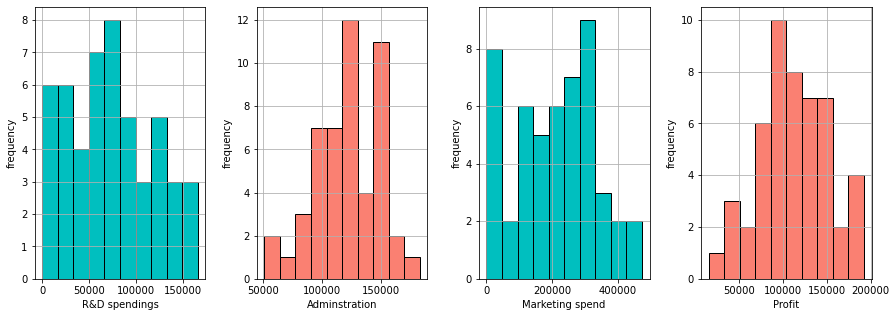

In [9]:
#checking the outliers if present in our dataset with the help of box plot and histogram plot
plt.figure(figsize = (15,5))

#outlier checking for R&D spendings
plt.subplot(1,4,1)
plt.xlabel('R&D spendings')
plt.ylabel('frequency')
startupsfinal['RDS'].hist(color='c',edgecolor='black')

#outlier checking for Adminstration
plt.subplot(1,4,2)
plt.xlabel('Adminstration')
plt.ylabel('frequency')
startupsfinal['Admin'].hist(color='salmon', edgecolor='black')

#outlier checking for Marketing spends
plt.subplot(1,4,3)
plt.xlabel('Marketing spend')
plt.ylabel('frequency')
startupsfinal['Mrktspnd'].hist(color='c', edgecolor='black')

#outlier checking for Profit
plt.subplot(1,4,4)
plt.xlabel('Profit')
plt.ylabel('frequency')
startupsfinal['Profit'].hist(color='salmon', edgecolor='black')

plt.subplots_adjust(wspace=0.3,hspace=0.3)

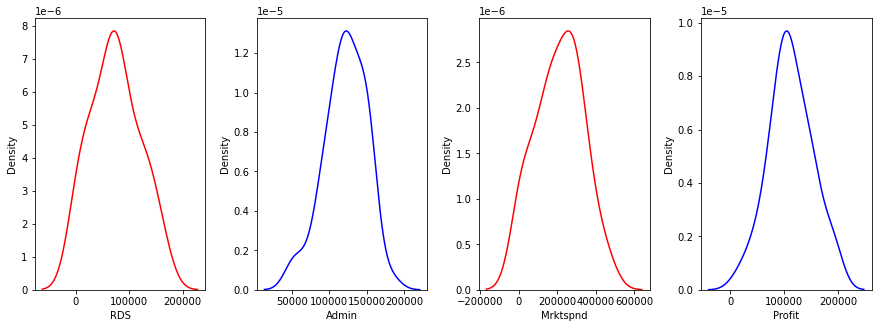

In [10]:
#checking if the data is Normally Distributed or not
plt.figure(figsize = (15,5))

#Normal distribution checking for R&D spendings
plt.subplot(1,4,1)
sns.kdeplot(startupsfinal['RDS'],color='red')

#Normal distribution checking for Administration
plt.subplot(1,4,2)
sns.kdeplot(startupsfinal['Admin'],color='blue')

#Normal distribution checking for Marketing spendings
plt.subplot(1,4,3)
sns.kdeplot(startupsfinal['Mrktspnd'],color='red')

#Normal distribution checking for Profits
plt.subplot(1,4,4)
sns.kdeplot(startupsfinal['Profit'],color='blue')

plt.subplots_adjust(wspace=0.3,hspace=0.3)

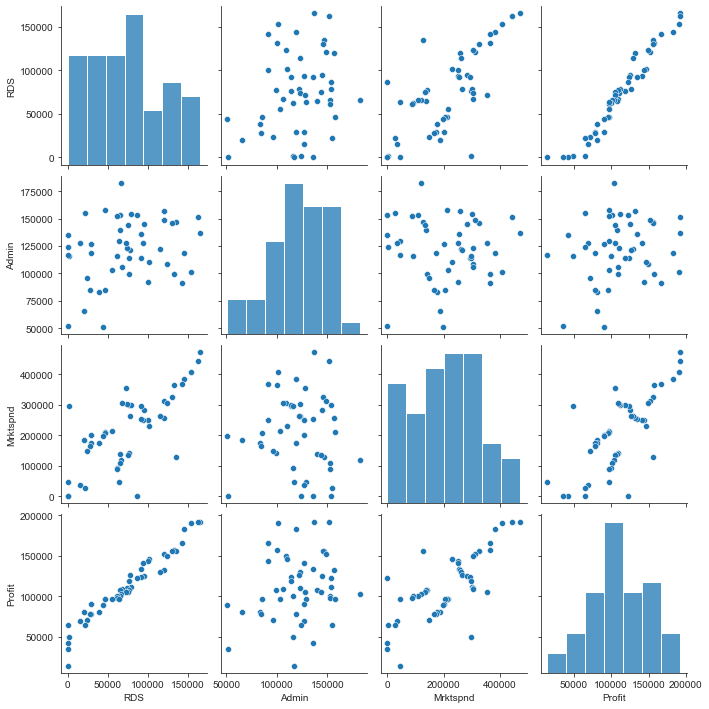

In [11]:
#Plotting the pairplot for our dataset
sns.set_style(style='ticks')
sns.pairplot(startupsfinal)


## Building various models
#### <code style="background:salmon;color:black">Model1:Building the model without applying any transformation</code>

In [12]:
#building a model with the help of ordinary least square method(OLS) and fitting it
model1 = smf.ols('Profit~RDS+Admin+Mrktspnd', data = startupsfinal).fit()

In [13]:
#checking our intercept and slope values
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
Mrktspnd         0.027228
dtype: float64

In [14]:
#Looking into our tvalues and pvalues to check the significant values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
Mrktspnd      1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
Mrktspnd     1.047168e-01
dtype: float64


In [15]:
#Knowing how much our input data is contributing to the output dqta i.e rsquare and adjusted rsquare values
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
#finally looking into summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        13:21:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrktspnd       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Predicting the values of our build model
pred1=model1.predict(startupsfinal)
pred1.head()

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [18]:
#actual data
actual=startupsfinal.Profit


In [19]:
#checking our root mean square error from predicted data with respect to actual data
root1=rmse(pred1,actual)
root1

8855.34448901514

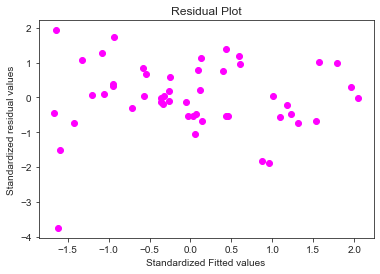

In [20]:
#Residual plot for homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid),color='magenta')

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

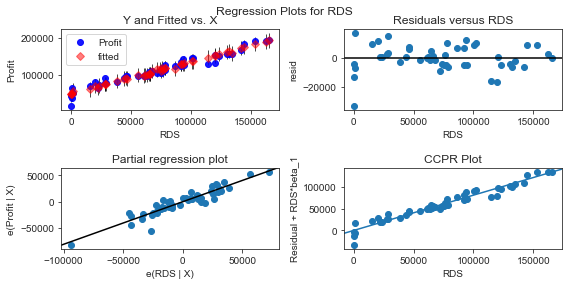

In [21]:
#Residual versus Regressor plot for R&D spendings
fig = plt.figure(figsize=(8,4))
fig = sm.graphics.plot_regress_exog(model1, "RDS", fig=fig)
plt.show()

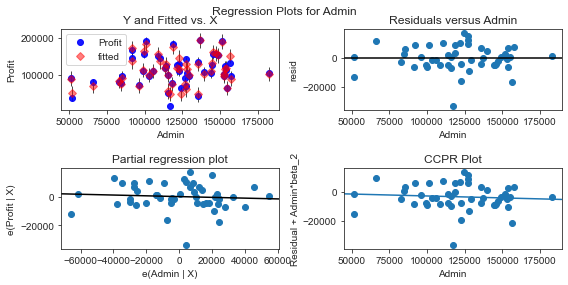

In [22]:
#Residual versus Regressor plot for Admin
fig = plt.figure(figsize=(8,4))
fig = sm.graphics.plot_regress_exog(model1, "Admin", fig=fig)
plt.show()

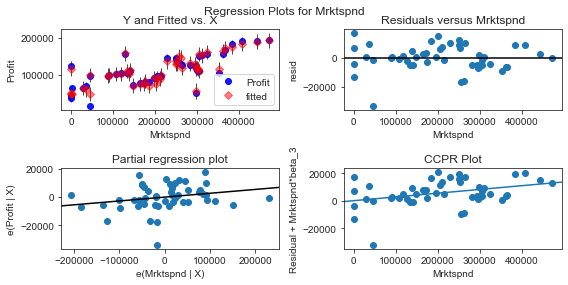

In [23]:
#Residual versus Regressor plot for Marketing spends
fig = plt.figure(figsize=(8,4))
fig = sm.graphics.plot_regress_exog(model1, "Mrktspnd", fig=fig)
plt.show()

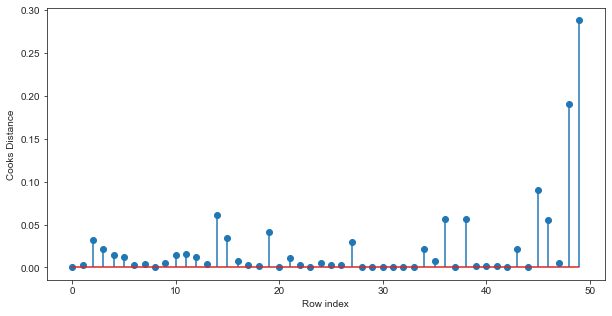

In [24]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 5))
plt.stem(np.arange(len(startupsfinal)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [25]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

In [26]:
startupsfinal[startupsfinal.index.isin([49])]


,RDS,Admin,Mrktspnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [27]:
startupsfinal1=startupsfinal.drop(startupsfinal.index[[49]],axis=0).reset_index()
startupsfinal1=startupsfinal1.drop(['index'],axis=1)
startupsfinal1.head()

,RDS,Admin,Mrktspnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [28]:
model2 = smf.ols('Profit~RDS+Admin+Mrktspnd', data = startupsfinal).fit()

In [29]:
#checking our intercept and slope values
model2.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
Mrktspnd         0.027228
dtype: float64

In [30]:
#Looking into our tvalues and pvalues to check the significant values
print(model2.tvalues, '\n', model2.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
Mrktspnd      1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
Mrktspnd     1.047168e-01
dtype: float64


In [31]:
#Knowing how much our input data is contributing to the output dqta i.e rsquare and adjusted rsquare values
(model2.rsquared,model2.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [32]:
#finally looking into summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        13:21:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrktspnd       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Predicting the values of our build model
pred2=model2.predict(startupsfinal1)
pred2.head()

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [34]:
actual1=startupsfinal1.Profit

In [35]:
#checking our root mean square error from predicted data with respect to actual data
root2=rmse(pred2,actual1)
root2

7554.354032419182

#### <code style="background:salmon;color:black">Model3: Predicing a model excluding Admin and Marketing spend columns, since their p values are greater than 0.05</code>

In [36]:
#building a model with the help of ordinary least square method(OLS) and fitting it
model3 = smf.ols('Profit~RDS', data = startupsfinal1).fit()

In [37]:
#finally looking into summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           7.56e-34
Time:                        13:21:16   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RDS            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#Predicting the values of our build model
pred3=model3.predict(startupsfinal1)
pred3.head()

0    188606.573993
1    186328.768947
2    178748.897683
3    171241.123108
4    169366.004854
dtype: float64

In [39]:
#checking our root mean square error from predicted data with respect to actual data
root3=rmse(pred3,actual1)
root3

7803.175973683114

In [40]:
#Creating the Rsquare tables of our model
df = {'Model':['Model1','Model2','Model3'],'R_Squared Value':(model1.rsquared,model2.rsquared,model3.rsquared),
      'Adj_Rsquare':(model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj),
     "RMSE":(root1,root2,root3)
     }
R_Square_Table = pd.DataFrame(df)
R_Square_Table 

,Model,R_Squared Value,Adj_Rsquare,RMSE
0,Model1,0.950746,0.947534,8855.344489
1,Model2,0.950746,0.947534,7554.354032
2,Model3,0.957340,0.956432,7803.175974


### Insights Drawn:
>By comparing the above models it is evident that Model1 predicts better than the Model2 since its contributing more compared to other Model